What are the differences between positive samples and false positives? Why does the model classify many instances as positive, while they are actually negative.

In [1]:
#define the false negatives

import pandas as pd
import numpy as np

train = pd.read_csv('train_us.csv')
test_us = pd.read_csv('test_us.csv')
test_imb = pd.read_csv('test_imbalanced.csv')
val = pd.read_csv('val_us.csv')

print (len(train))

74650


In [2]:
test_pred = np.load('y_pred_cnn_clahe.npy')

print (test_pred)

test_imb['pred_class'] = test_pred

test_imb

[0 0 0 ... 0 0 0]


,filename,class,AR_number,flare_strength,flare_category,pred_class
0,2379/2379_hmi.M_720s.20150709_190000_TAI.1.mag...,0,2379,0,0,0
1,2600/2600_hmi.M_720s.20161009_011200_TAI.3.mag...,0,2600,0,0,0
2,1443/1443_hmi.M_720s.20120328_184800_TAI.1.mag...,0,1443,0,0,0
3,1490/1490_hmi.M_720s.20120531_121200_TAI.1.mag...,0,1490,0,0,0
4,2585/2585_hmi.M_720s.20160904_013600_TAI.3.mag...,0,2585,0,0,1
...,...,...,...,...,...,...
24170,1929/1929_hmi.M_720s.20131221_092400_TAI.1.mag...,0,1929,0,0,0
24171,1820/1820_hmi.M_720s.20130817_111200_TAI.1.mag...,0,1820,0,0,0
24172,1351/1351_hmi.M_720s.20111116_103600_TAI.1.mag...,0,1351,0,0,0
24173,2680/2680_hmi.M_720s.20170916_112400_TAI.3.mag...,0,2680,0,0,0


In [3]:
#false positives are when the model predicts 1, but class is 0

test_imb['false_positive'] = (test_imb['class'] == 0) & (test_imb['pred_class'] == 1)

test_imb

,filename,class,AR_number,flare_strength,flare_category,pred_class,false_positive
0,2379/2379_hmi.M_720s.20150709_190000_TAI.1.mag...,0,2379,0,0,0,False
1,2600/2600_hmi.M_720s.20161009_011200_TAI.3.mag...,0,2600,0,0,0,False
2,1443/1443_hmi.M_720s.20120328_184800_TAI.1.mag...,0,1443,0,0,0,False
3,1490/1490_hmi.M_720s.20120531_121200_TAI.1.mag...,0,1490,0,0,0,False
4,2585/2585_hmi.M_720s.20160904_013600_TAI.3.mag...,0,2585,0,0,1,True
...,...,...,...,...,...,...,...
24170,1929/1929_hmi.M_720s.20131221_092400_TAI.1.mag...,0,1929,0,0,0,False
24171,1820/1820_hmi.M_720s.20130817_111200_TAI.1.mag...,0,1820,0,0,0,False
24172,1351/1351_hmi.M_720s.20111116_103600_TAI.1.mag...,0,1351,0,0,0,False
24173,2680/2680_hmi.M_720s.20170916_112400_TAI.3.mag...,0,2680,0,0,0,False


(-0.5, 223.5, 223.5, -0.5)

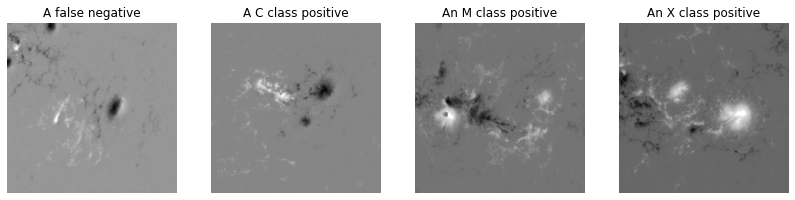

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt

fp = test_imb[test_imb['false_positive'] == True]
fp_example = fp['filename'].sample(1).values[0]

c_class = test_imb[test_imb['flare_category']=='C1 - C3']
c_example = c_class['filename'].sample(1).values[0]

m_class = test_imb[test_imb['flare_category']=='M1 - M3']
m_example = m_class['filename'].sample(1).values[0]

x_class = test_imb[test_imb['flare_category']=='> X1']
x_example = x_class['filename'].sample(1).values[0]

fig,axes = plt.subplots(1, 4,figsize= (14,7))

img_fp = cv.imread ('images_by_AR/' + fp_example, cv.IMREAD_GRAYSCALE)
img_c = cv.imread ('images_by_AR/' + c_example, cv.IMREAD_GRAYSCALE)
img_m = cv.imread ('images_by_AR/' + m_example, cv.IMREAD_GRAYSCALE)
img_x = cv.imread ('images_by_AR/' + x_example, cv.IMREAD_GRAYSCALE)

axes[0].imshow(img_fp, cmap = 'gray')
axes[0].set_title ('A false negative')
axes[0].axis('off')

axes[1].imshow(img_c, cmap = 'gray')
axes[1].set_title ('A C class positive')
axes[1].axis('off')

axes[2].imshow(img_m, cmap = 'gray')
axes[2].set_title ('An M class positive')
axes[2].axis('off')

axes[3].imshow(img_x, cmap = 'gray')
axes[3].set_title ('An X class positive')
axes[3].axis('off')

(-0.5, 223.5, 223.5, -0.5)

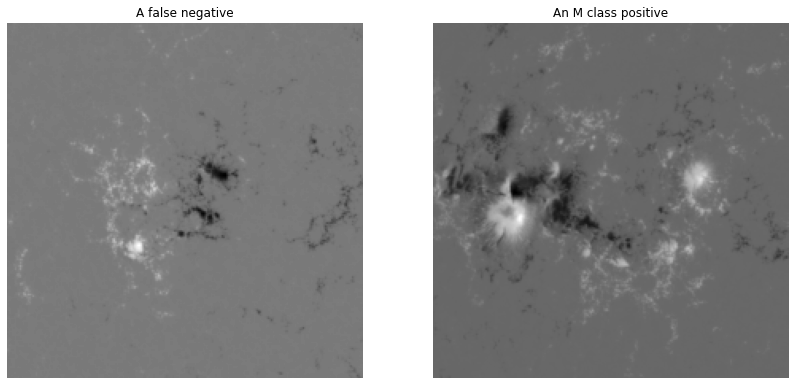

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

fp = test_imb[test_imb['false_positive'] == True]
fp_example = fp['filename'].sample(1).values[0]

m_class = test_imb[test_imb['flare_category']=='M1 - M3']
m_example = m_class['filename'].sample(1).values[0]

fig,axes = plt.subplots(1, 2,figsize= (14,7))

img_fp = cv.imread ('images_by_AR/' + fp_example, cv.IMREAD_GRAYSCALE)
img_m = cv.imread ('images_by_AR/' + m_example, cv.IMREAD_GRAYSCALE)

axes[0].imshow(img_fp, cmap = 'gray')
axes[0].set_title ('A false negative')
axes[0].axis('off')

axes[1].imshow(img_m, cmap = 'gray')
axes[1].set_title ('An M class positive')
axes[1].axis('off')

(-0.5, 223.5, 223.5, -0.5)

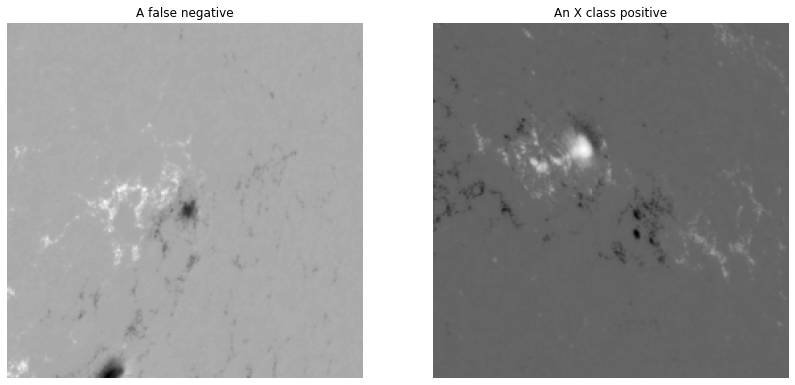

In [81]:
import cv2 as cv
import matplotlib.pyplot as plt

fp = test_imb[test_imb['false_positive'] == True]
fp_example = fp['filename'].sample(1).values[0]

x_class = test_imb[test_imb['flare_category']=='> X1']
x_example = x_class['filename'].sample(1).values[0]

fig,axes = plt.subplots(1, 2,figsize= (14,7))

img_fp = cv.imread ('images_by_AR/' + fp_example, cv.IMREAD_GRAYSCALE)
img_x = cv.imread ('images_by_AR/' + m_example, cv.IMREAD_GRAYSCALE)

axes[0].imshow(img_fp, cmap = 'gray')
axes[0].set_title ('A false negative')
axes[0].axis('off')

axes[1].imshow(img_x, cmap = 'gray')
axes[1].set_title ('An X class positive')
axes[1].axis('off')